In [181]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, f1_score, accuracy_score, classification_report, mean_squared_error, r2_score

# Data Loading

In [4]:
data_path = Path(os.getcwd())
print(data_path.exists())

True


In [5]:
if data_path:
    path = os.path.join(data_path,"loan_approval_dataset.csv")
    df = pd.read_csv(path)

# EDA

In [6]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.describe(include='all')

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269,4269,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Graduate,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Approved
freq,NaN,NaN,2144,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2656
mean,2135.000000,2.498712,NaN,NaN,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,NaN
std,1232.498479,1.695910,NaN,NaN,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,NaN
min,1.000000,0.000000,NaN,NaN,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,NaN
25%,1068.000000,1.000000,NaN,NaN,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,NaN
50%,2135.000000,3.000000,NaN,NaN,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,NaN
75%,3202.000000,4.000000,NaN,NaN,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,NaN


In [9]:
df.shape

(4269, 13)

## Understanding data

In [11]:
df.columns.to_list()

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

# Featuring Engineering

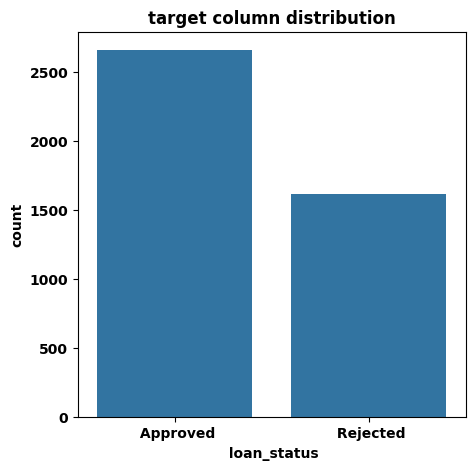

In [35]:
# understanding loan status distribution
plt.figure(figsize=(5,5))
sns.countplot(df,x=' loan_status')
plt.title("target column distribution")
plt.show()

In [40]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [64]:
df.columns = df.columns.str.strip().str.lower()

In [88]:
#drop id
df = df.drop(columns=['loan_id'],errors='ignore')

In [148]:
df_clf = df.dropna(subset=['loan_status']).copy()

In [149]:
target_col = 'loan_status'

In [150]:
x = df_clf.drop(columns=[target_col])
y = df_clf[target_col]

Feature types

In [89]:
cat_cols = x.select_dtypes(include=['object','category']).columns.tolist()
num_cols = x.select_dtypes(include=[np.number]).columns.tolist()

In [90]:
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: ['education', 'self_employed']
Numerical columns: ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']


# Preprocessing pipeline

In [118]:
# transforming categorical data to numrical data
catagorical_tranformer = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encoding',OneHotEncoder(handle_unknown='ignore'))
])

In [119]:
# tranformation for numerical column
num_transformer = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scale',StandardScaler())
])

In [120]:
clf_preprocessing = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', catagorical_tranformer,cat_cols)
],remainder='drop')

# Stage 1: Classification Baseline

In [121]:
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [122]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [123]:
y.unique()

array([1, 0])

In [124]:
y = df_clf[target_col].str.strip().str.lower()

In [125]:
y = (y=='approved').astype(int)

In [126]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print("Train/test sizes:", x_train.shape, x_test.shape)

Train/test sizes: (3415, 11) (854, 11)


# Fit Randomforest in pipeline

In [128]:
rf_pipepline = Pipeline(steps=[
    ('preprocessing', clf_preprocessing),
    ('rf', RandomForestClassifier(random_state=42,criterion='gini',bootstrap=True,oob_score=True))
])

In [129]:
rf_param_grid = {
    'rf__n_estimators':[100,200,300],
    'rf__max_depth' : [None, 4,8,10],
    'rf__max_features': ['sqrt', None]
}

In [130]:
grid = GridSearchCV(rf_pipepline, rf_param_grid, cv=5, scoring='f1',n_jobs=-1)
grid.fit(x_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'rf__max_depth': [None, 4, ...], 'rf__max_features': ['sqrt', None], 'rf__n_estimators': [100, 200, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


In [135]:
print(grid.best_params_)
best_model = grid.best_estimator_
y_test_pred_best = best_model.predict(x_test)
print(classification_report(y_test, y_test_pred_best))
print("accuracy : ",accuracy_score(y_test,y_test_pred_best))

{'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__n_estimators': 200}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

accuracy :  0.9812646370023419


In [137]:
rf_pipepline = Pipeline(steps=[
    ('preprocessing', clf_preprocessing),
    ('rf', RandomForestClassifier(n_estimators=200,max_features='sqrt',max_depth=None,random_state=42,criterion='gini',bootstrap=True,oob_score=True))
])

In [138]:
rf_pipepline.fit(x_train,y_train)
y_test_pred_rf = rf_pipepline.predict(x_test)
print(classification_report(y_test, y_test_pred_best))
print("accuracy : ",accuracy_score(y_test,y_test_pred_best))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

accuracy :  0.9812646370023419


In [139]:
rf_pipepline

,steps,"[('preprocessing', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Stage 2: Loan Amount Prediction

In [140]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [141]:
df['loan_status'] = df['loan_status'].str.strip().str.lower()

In [142]:
df['loan_status'].unique()

array(['approved', 'rejected'], dtype=object)

In [143]:
approved_df = df[df['loan_status']=='approved'].copy()

In [144]:
approved_df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,approved
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,approved
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,approved
10,4,Graduate,Yes,2900000,11200000,2,547,8100000,4700000,9500000,3100000,approved
13,2,Graduate,Yes,9100000,31500000,14,679,10800000,16600000,20900000,5000000,approved


In [153]:
reg_target = 'loan_amount'
reg_df = approved_df.dropna(subset=[reg_target]).copy()

In [154]:
x_reg = reg_df.drop(columns=[reg_target])
y_reg = reg_df[reg_target]

In [155]:
num_cols_reg = x_reg.select_dtypes(include=[np.number]).columns.tolist()
cat_cols_reg = x_reg.select_dtypes(include=['object']).columns.tolist()

In [156]:
print("Regression Numerical:", num_cols_reg)
print("Regression Categorical:", cat_cols_reg)

Regression Numerical: ['no_of_dependents', 'income_annum', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Regression Categorical: ['education', 'self_employed', 'loan_status']


In [157]:
x_train_rg, x_test_rg, y_train_rg, y_test_rg = train_test_split(x_reg,y_reg, test_size=0.2, random_state=42)

In [ ]:
# preprocessing pipline for regression
reg_preprocessing = ColumnTransformer(transformers=[
    ('num', StandardScaler(),num_cols_reg),
    ('col',OneHotEncoder(handle_unknown='ignore'),cat_cols_reg)
])

In [ ]:
reg_pipeline = Pipeline(steps=(
    ('preprocessing',reg_preprocessing),
    ('rf',RandomForestRegressor(random_state=42,criterion='squared_error',bootstrap=True,oob_score=True))
))

In [170]:
rfr_param_grid = {
    'rf__n_estimators':[100,200,250],
    'rf__max_depth': [5,6,8,None],
    'rf__min_samples_split': [2,5,10]
}

In [171]:
grid_reg = GridSearchCV(reg_pipeline,rfr_param_grid,cv=5,scoring='r2',n_jobs=-1)
grid_reg.fit(x_train_rg,y_train_rg)

,estimator,Pipeline(step...m_state=42))))
,param_grid,"{'rf__max_depth': [5, 6, ...], 'rf__min_samples_split': [2, 5, ...], 'rf__n_estimators': [100, 200, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('col', ...)]"


In [180]:
print(grid_reg.best_params_)
best_model_reg = grid_reg.best_estimator_
y_pred_reg = best_model_reg.predict(x_test_rg)
print(f"MSE: {mean_squared_error(y_test_rg,y_pred_reg)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_rg,y_pred_reg))}")
print(f"r2 score: {r2_score(y_test_rg,y_pred_reg)}")

{'rf__max_depth': 5, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
MSE: 10754613009138.74
RMSE: 3279422.663997238
r2 score: 0.8748760390270471


In [192]:
rf_pipepline.fit(x_train,y_train)
reg_pipeline.fit(x_train_rg,y_train_rg)

,steps,"[('preprocessing', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('col', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Save artifacts

In [193]:
joblib.dump(rf_pipepline,"models/stage_1_rf_classifier_pipeline.pkl")
joblib.dump(reg_pipeline,"models/stage_2_rf_regression_pipeline.pkl")

['models/stage_2_rf_regression_pipeline.pkl']

# Prediction Funtion

In [194]:
clf = joblib.load('models/stage_1_rf_classifier_pipeline.pkl')
reg = joblib.load('models/stage_2_rf_regression_pipeline.pkl')

In [195]:
example_row = x_test.iloc[[0]]
print("Example row:")
display(example_row)


Example row:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2856,3,Not Graduate,Yes,8300000,31400000,6,674,1000000,1600000,17200000,6100000


In [204]:
def two_stage_pred(test_data):
    out = {}

    # stage 1: Loan Aprroval
    approve = clf.predict(test_data)[0]
    out['loan_status'] = int(approve)

    if approve == 1:
        print("Your Loan application is aprroved by the ML system")
        applicant_df_reg = test_data.drop(columns=['loan_amount']).copy()
        applicant_df_reg['loan_status'] = 'approve'

        # stage 2: prediction loan amount
        loan_amount_pred = reg.predict(applicant_df_reg)[0]
        out['predicted_loan_amount'] = float(loan_amount_pred)
    else:
        out['predicted_loan_amount'] = None
    return out


In [205]:
print(two_stage_pred(example_row))

Your Loan application is aprroved by the ML system
{'loan_status': 1, 'predicted_loan_amount': 23399000.0}


In [206]:
user_input = {
    "no_of_dependents": int(input("No. of Dependents: ")),
    "education": input("Education (Graduate/Not Graduate): "),
    "self_employed": input("Self Employed (Yes/No): "),
    "income_annum": float(input("Annual Income: ")),
    "loan_amount": float(input("Loan Amount Requested: ")),
    "loan_term": int(input("Loan Term (in years): ")),
    "cibil_score": int(input("CIBIL Score: ")),
    "residential_assets_value": float(input("Residential Assets Value: ")),
    "commercial_assets_value": float(input("Commercial Assets Value: ")),
    "luxury_assets_value": float(input("Luxury Assets Value: ")),
    "bank_asset_value": float(input("Bank Asset Value: "))
}

applicant_df = pd.DataFrame([user_input])

result = two_stage_pred(applicant_df)

print("Final Output:")
print(result)

Your Loan application is aprroved by the ML system
Final Output:
{'loan_status': 1, 'predicted_loan_amount': 4234000.0}
